## K-Nearest Neighbors Alogrithm

In [1]:
import pandas as pd


df = pd.read_csv('mldata.csv')
df.head()


,age,height,weight,gender,likeness
0,27,170.688,76.0,Male,Biryani
1,41,165.000,70.0,Male,Biryani
2,29,171.000,80.0,Male,Biryani
3,27,173.000,102.0,Male,Biryani
4,29,164.000,67.0,Male,Biryani


In [2]:
df['gender']=df['gender'].replace('Male',0)
df['gender']=df['gender'].replace('Female',1)



In [3]:
x = df[['age','height','weight']]
y = df['likeness']

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)


scaled_features = scaler.transform(x)

scaled_data = pd.DataFrame(scaled_features, columns =x.columns)


In [5]:
x = scaled_data
y = df['likeness']

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7).fit(X,y)

model.predict([[36,130,64,0]])


NameError: name 'X' is not defined

In [ ]:

# for evaluation and measuring accuracy score 

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

model = KNeighborsClassifier(n_neighbors=8).fit(X_train,y_train)

predicted_values = model.predict(X_test)

score = accuracy_score(predicted_values,y_test)

print('the accuracy is',score*100 , '%')








the accuracy is 65.3061224489796 %


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predicted_values))
print(confusion_matrix(y_test, predicted_values))


              precision    recall  f1-score   support

     Biryani       0.65      1.00      0.79        32
      Pakora       0.00      0.00      0.00         9
      Samosa       0.00      0.00      0.00         8

    accuracy                           0.65        49
   macro avg       0.22      0.33      0.26        49
weighted avg       0.43      0.65      0.52        49

[[32  0  0]
 [ 9  0  0]
 [ 8  0  0]]


C:\Users\AI\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AI\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AI\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\AI\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


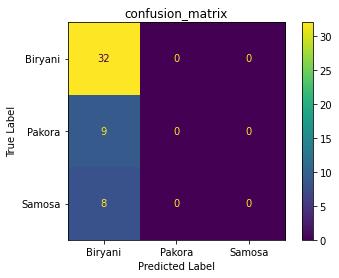

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 

matrix = plot_confusion_matrix(model, X_test, y_test)
plt.title('confusion_matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [ ]:
import numpy as np
error_rates = []
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rates.append(np.mean(new_predictions != y_test))

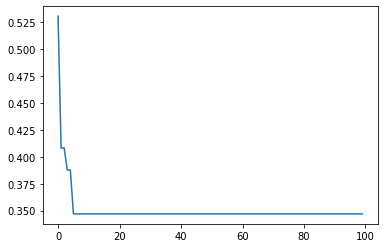

In [ ]:
plt.plot(error_rates)